In [ ]:
import pandas as pd
import seaborn as sns


df = pd.read_csv('questions_by_human.csv')
df = df.dropna()
df

,idCategory,Category,Question,Expected Answer,GPT Answer,Mistral Answer,Similarity Score Mistral,Similarity Score GPT
0,1,Physical Properties,"When you touch silk with your hand, how does i...","Silk is soft and glides on the hand, while bur...",Silk feels much smoother and softer than burlap.,"Silk feels smooth and soft, while burlap is ro...",0.927338,0.873260
1,1,Physical Properties,Does a wooden cube float on water? How does it...,"Yes, it floats. Part of the cube is in the wat...","Yes, a wooden cube will float on water. It wil...",A wooden cube typically floats on water due to...,0.729775,0.805440
2,1,Physical Properties,If a ceramic vase falls on the ground and you ...,I might cut my foot.,You could get cut or injured by the sharp edge...,You might get hurt by broken pieces.,0.422573,0.367848
3,1,Physical Properties,Can you hold a ping pong ball in your hand?,"Yes, I can hold a ping pong ball in my hand.","Yes, I can hold a ping pong ball in my hand.","Yes, a ping pong ball can easily fit in the pa...",0.836752,1.000000
4,1,Physical Properties,Have you ever slipped on ice?,"Yes, I almost fell when I was a child.","Yes, I have slipped on ice before. It was a sc...","No, I haven't. I don't have a physical body or...",0.420232,0.459779
5,2,Causal Relationships,What happens if you blow on a lit candle?,The flame will go out.,Blowing on a lit candle will extinguish the fl...,The flame flickers and may extinguish due to t...,0.606828,0.699896
6,2,Causal Relationships,Have you ever popped a balloon by blowing too ...,"Yes, the first time it surprised me a lot with...","Yes, I have popped a balloon before by blowing...","No, I can't physically interact with objects l...",0.102925,0.529724
7,2,Causal Relationships,"When you look at an aquarium, do the fish appe...","Yes, the glass acts like a magnifying lens.","Yes, fish appear larger in the aquarium due to...","No, fish do not appear larger from the outside...",0.355058,0.408531
8,2,Causal Relationships,"If you have an apple in your hand and drop it,...",It will fall because of gravity.,The apple will fall to the ground due to the f...,The apple falls to the ground due to gravity.,0.595678,0.681369
9,2,Causal Relationships,What happens when you heat a metal rod?,The heat will gradually spread throughout the ...,Heating a metal rod causes it to expand due to...,"When you heat a metal rod, it expands and beco...",0.717440,0.711920


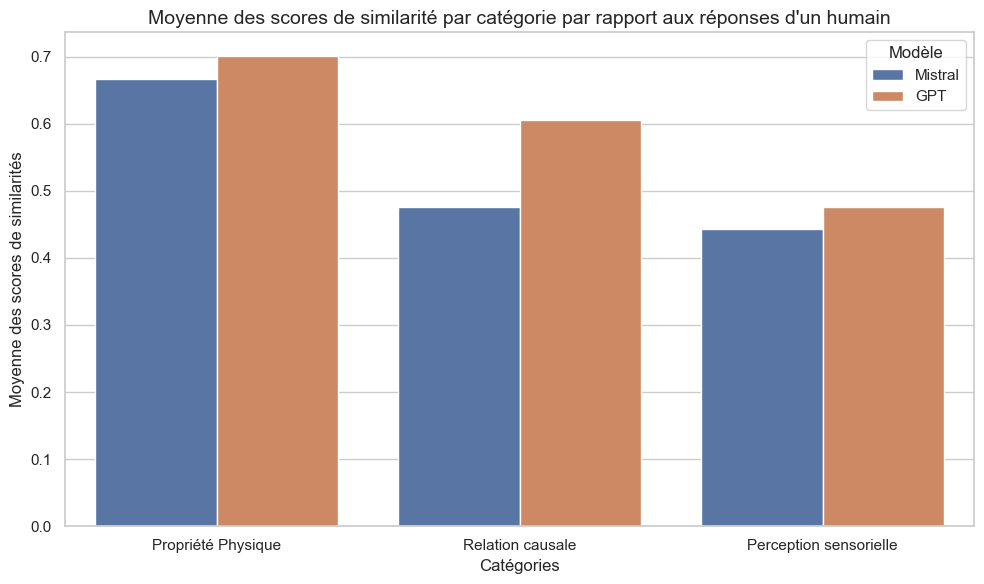

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculer les moyennes par catégorie
mean_mistral = df.groupby('idCategory')['Similarity Score Mistral'].mean()
mean_gpt = df.groupby('idCategory')['Similarity Score GPT'].mean()

categories = ["Propriété Physique", "Relation causale", "Perception sensorielle"]

# Créer un DataFrame pour le graphique
comparison_df = pd.DataFrame({
	"Category": categories,
    "Mistral": mean_mistral,
    "GPT": mean_gpt
})

# Préparer les données pour un graphique en barres
comparison_df_melted = comparison_df.melt(id_vars="Category", var_name="Model", value_name="Similarity Score")

# Tracer le graphique avec Seaborn
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=comparison_df_melted, x="Category", y="Similarity Score", hue="Model")

# Ajouter des labels et un titre
ax.set_title("Moyenne des scores de similarité par catégorie par rapport aux réponses d'un humain", fontsize=14)
ax.set_xlabel("Catégories", fontsize=12)
ax.set_ylabel("Moyenne des scores de similarités", fontsize=12)
plt.legend(title="Modèle")
plt.tight_layout()

# Afficher le graphique
plt.show()

